In [1]:
import numpy as np
import pandas as pd
from astropy.time import Time
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
df_Fink_AL = pd.read_csv('../classifications/ALbot_with_classifications_curated_original.tsv', sep='\t')
df_Fink_AL['fup_jd'] = [Time(datetime.strptime(d[0], '%d/%m/%Y')).jd for d in df_Fink_AL[['Appears in bot']].values]

In [3]:
df_tns_tmp = pd.read_parquet('../classifications/tns_fink_20230817.parquet')


def extract_ztf_names(row):
    """Function to extract names starting with 'ZTF'

    Args:
        row (pd.row):  DataFrame row

    Returns:
        str: ZTF name
    """
    if row:
        ztf_list = [
            name.strip() for name in row.split(",") if name.strip().startswith("ZTF")
        ]
        if len(ztf_list) > 0:
            return ztf_list[0]
        else:
            return ""
    else:
        return ""
    
# with ZTF data
df_tns_tmp.loc[:, "internal_names"] = df_tns_tmp.loc[:, "internal_names"].fillna(value="")
df_tns = df_tns_tmp[df_tns_tmp["internal_names"].str.contains("ZTF")].copy()
df_tns.loc[:, "ztf_names"] = (
    df_tns.loc[:, "internal_names"].apply(extract_ztf_names).to_numpy()
)

# reformatting time columns
df_tns["discoveryjd"] = [Time(d, format="iso").jd for d in df_tns["discoverydate"]]

In [4]:
# fink fup in TNS
print(len(df_Fink_AL[df_Fink_AL['ztf_names'].isin(df_tns['ztf_names'])]), 'Fink fup in TNS')
print(f"from {len(df_Fink_AL)} Fink alerts")

75 Fink fup in TNS
from 94 Fink alerts


In [6]:
df_tns_fink_fup = pd.merge(df_Fink_AL, df_tns, on='ztf_names', how='inner')
print(len(df_tns_fink_fup), 'Fink fup in TNS')

75 Fink fup in TNS


In [7]:
df_tns_fink_fup.keys()

Index(['Appears in bot', 'ztf_names', 'Classification',
       'Time sent for follow-up', 'fup_jd', 'objid', 'name_prefix', 'name',
       'ra', 'declination', 'redshift', 'typeid', 'type', 'reporting_groupid',
       'reporting_group', 'source_groupid', 'source_group', 'discoverydate',
       'discoverymag', 'discmagfilter', 'filter', 'reporters', 'time_received',
       'internal_names', 'Discovery_ADS_bibcode', 'Class_ADS_bibcodes',
       'creationdate', 'lastmodified', 'fullname', 'internalname',
       'discoveryjd'],
      dtype='object')

In [8]:
df_tns_fink_fup['delta_discover_fup'] = df_tns_fink_fup.discoveryjd - df_tns_fink_fup.fup_jd

-9.533999999985099
-9.512381446460882


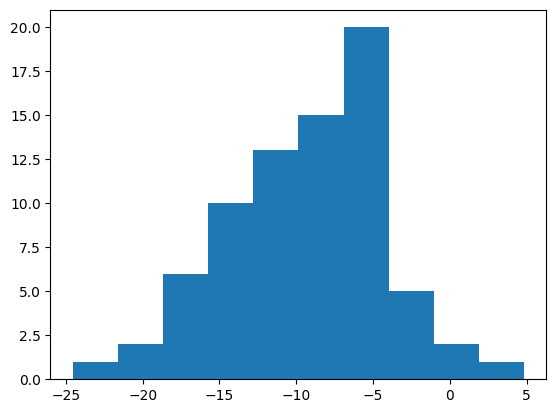

In [9]:
plt.hist(df_tns_fink_fup['delta_discover_fup'], bins=10)
print(df_tns_fink_fup['delta_discover_fup'].median())
print(df_tns_fink_fup['delta_discover_fup'].mean())